In [1]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

In [2]:
def residual_analysis(a):
    #Histogram
    _ = plt.hist(a.resid_pearson, bins = 'auto')
    plt.title('Histogram')
    plt.show()
    
    #Histogram
    fig = sm.qqplot(a.resid_pearson, stats.norm, fit=True, line='45')
    plt.title('Q-Q Plot')
    plt.show()
    
    #Heteroscedasticity and Homoscedasticity
    st, data, ss2 = sso.summary_table(a, alpha=0.05)
    #Predicted value
    x = data[:, 2]
    #Residual
    y = data[:, 8]
    _ = plt.plot(x, y, 'o', color = 'b')
    plt.title('Heteroscedasticity and Homoscedasticity')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')
    plt.show()
    
    #Outliers
    st, data, ss2 = sso.summary_table(a, alpha=0.05)
    #Predicted value
    x = data[:, 2]
    #Studentized Residual
    y = data[:, 10]
    plt.plot(x, y, 'o', color = 'gray')
    plt.title('Outliers')
    plt.axhline(y=2, color = 'red', lw = 0.8)
    plt.axhline(y=-2, color = 'red', lw = 0.8)
    plt.show()
    
    #Influential Observations
    x = data[:, 2]
    cook_dist = data[:, 11]
    plt.plot(x, cook_dist, 'o', color = 'gray')
    plt.title("Cook's Distance")
    plt.show()

## OR 107

### 影片長度與觀看倍數

In [3]:
df1 = pd.read_excel('or107_videoLenVs_0614.xlsx')

print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
0,4526,914,5.915663,0.780378,1.420191
1,4530,712,2.771084,0.249425,1.307856
2,4503,784,0.228916,0.023574,1.610781
3,4511,710,1.662651,0.477295,1.523039
4,4501,651,5.000000,0.584421,1.465204


Tail of dataset:


,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
75,4510,692,1.13253,0.598858,1.500569
76,5954,199,0.00000,0.048617,1.001164
77,5955,190,0.00000,0.037793,1.052601
78,5956,188,0.00000,0.055883,1.200992
79,5953,187,0.00000,0.075833,1.154978


In [4]:
df1 = df1.replace(0, np.nan)
df1 = df1.dropna()
df1.describe()

,video_id,len,avg_pause_cnt,avg_freq,avg_playback_rate
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,4537.793103,837.827586,3.533029,0.556943,1.460915
std,22.456788,210.557417,2.950984,0.186683,0.076988
min,4501.000000,355.000000,0.024096,0.023574,1.292094
25%,4519.250000,691.250000,1.671687,0.487779,1.414891
50%,4538.000000,813.000000,2.915663,0.585792,1.471480
75%,4552.750000,989.500000,4.725904,0.650044,1.497086
max,4578.000000,1271.000000,14.638554,0.919319,1.796787


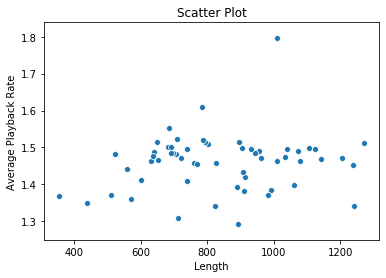

In [5]:
sns.scatterplot(x = df1['len'], y = df1['avg_playback_rate'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Playback Rate')
plt.show()

In [6]:
# Fit regression model 
df1_result = smf.ols('avg_playback_rate ~ len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_playback_rate   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.031
Date:                Mon, 15 Jun 2020   Prob (F-statistic):              0.314
Time:                        12:54:31   Log-Likelihood:                 67.453
No. Observations:                  58   AIC:                            -130.9
Df Residuals:                      56   BIC:                            -126.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4197      0.042     33.961      0.0

### Residual Analysis

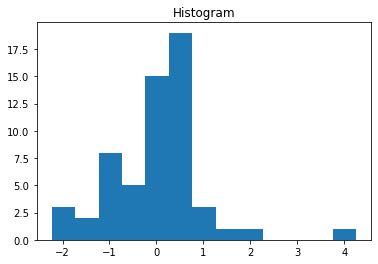

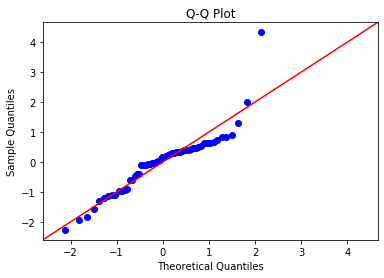

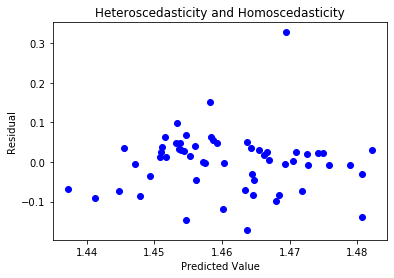

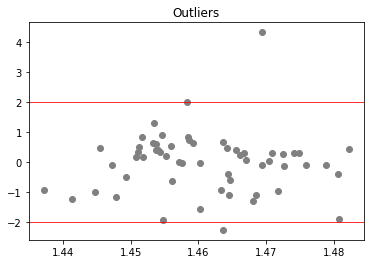

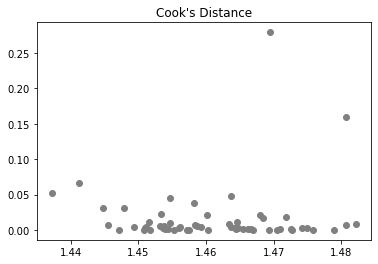

In [7]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [8]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.893, p=0.000


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.000 < 0.05, there is sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is not satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is no sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There are two outliers <br>
There is no observation with Cook’s distance > 1. Therefore, there is no significant influential observation

### 影片長度與影片完成度

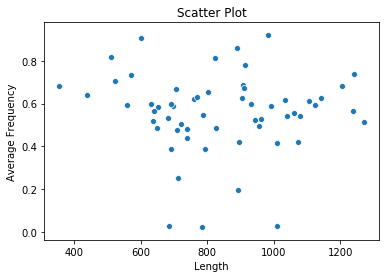

In [9]:
sns.scatterplot(x = df1['len'], y = df1['avg_freq'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Frequency')
plt.show()

In [10]:
# Fit regression model 
df1_result = smf.ols('avg_freq ~ len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_freq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1118
Date:                Mon, 15 Jun 2020   Prob (F-statistic):              0.739
Time:                        12:54:48   Log-Likelihood:                 15.608
No. Observations:                  58   AIC:                            -27.22
Df Residuals:                      56   BIC:                            -23.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5901      0.102      5.774      0.0

### Residual Analysis

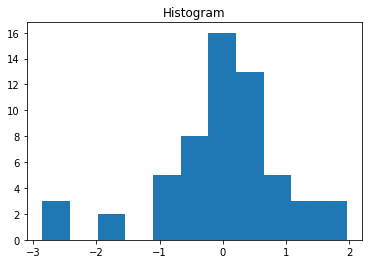

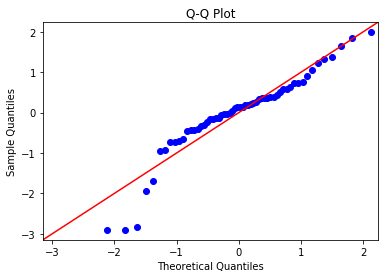

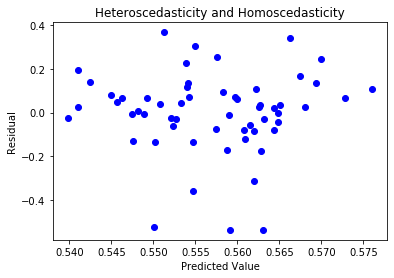

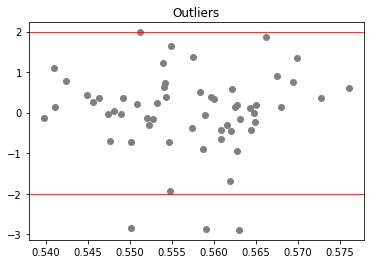

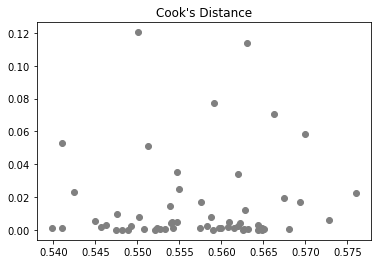

In [11]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [12]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.912, p=0.000


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.000 < 0.05, there is sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is not satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There are three outliers <br>
There is no observation with Cook’s distance > 1. Therefore, there is no significant influential observation

### 影片長度與暫停次數

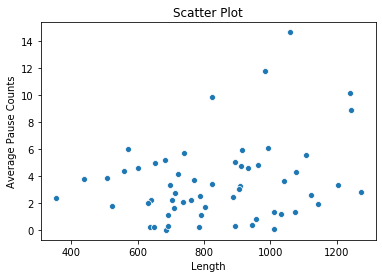

In [13]:
sns.scatterplot(x = df1['len'], y = df1['avg_pause_cnt'])

plt.title('Scatter Plot')
plt.xlabel('Length')
plt.ylabel('Average Pause Counts')
plt.show()

In [14]:
# Fit regression model 
df1_result = smf.ols('avg_pause_cnt ~ len', data=df1).fit()

# Inspect the results
print(df1_result.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_pause_cnt   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.286
Date:                Mon, 15 Jun 2020   Prob (F-statistic):             0.0430
Time:                        12:55:30   Log-Likelihood:                -142.42
No. Observations:                  58   AIC:                             288.8
Df Residuals:                      56   BIC:                             293.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4021      1.559      0.258      0.7

### Residual Analysis

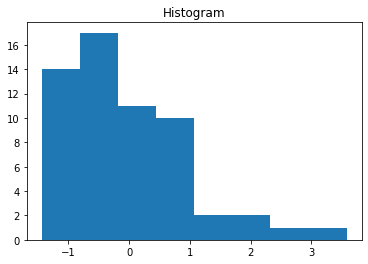

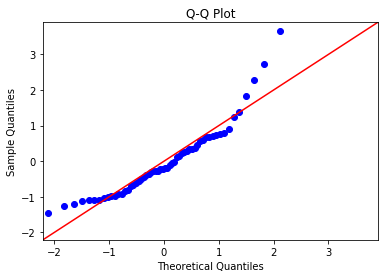

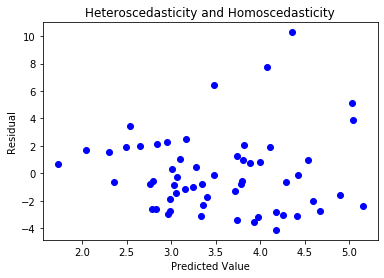

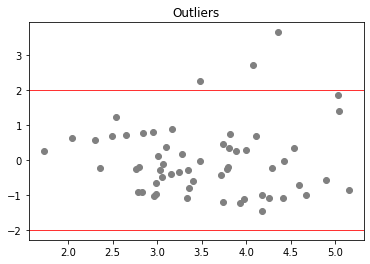

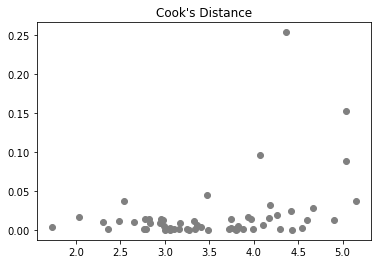

In [15]:
residual_analysis(df1_result)

### Checking Normality Assumption

Shapiro Test <br>
H0 : The data is normally distributed. <br>
H1 : The data is not normally distributed.

In [16]:
stat, p = stats.shapiro(df1_result.resid_pearson)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.906, p=0.000


Histogram and Q-Q plot look OK. Because the testing result of Shapiro-Wilk test shows that p_value = 0.000 < 0.05, there is sufficient evidence that the data is not normally distributed at the 5% significance level. Therefore, we conclude that the normality assumption is not satisfied

### Checking Heteroscedasticity and Homoscedasticity 

There is no sign for Heteroscedasticity

### Checking Residual Autocorrelation

We collect datas independently. Therefore, there will be no sign for autocorrelation

### Checking Outliers and Influential Observations

There are three outliers <br>
There is no observation with Cook’s distance > 1. Therefore, there is no significant influential observation